<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/statistics_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Итоговая работа

Анализ данных hr.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import requests
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('HR.csv')
print(data.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

### 1. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

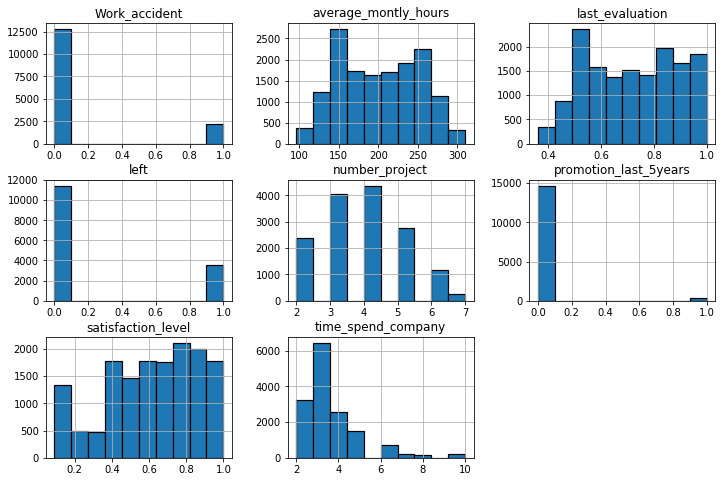

In [3]:
# посмотрим на типы распределений
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Несчастный случай, Повышение за последние 5 лет, Уволен - биноминальные распределения. Заработная плата, sales, количество проектов - дискретная переменная

In [4]:
object_columns = [i for i in data.columns if data[i].dtype.name == 'object']
numerical_columns   = [i for i in data.columns if data[i].dtype.name != 'object']

In [5]:
data[numerical_columns].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data[object_columns].describe()

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [7]:
for i in object_columns:
    print(data[i].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [8]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Рассчитать и визуализировать корреляционную матрицу для переменных 

In [9]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


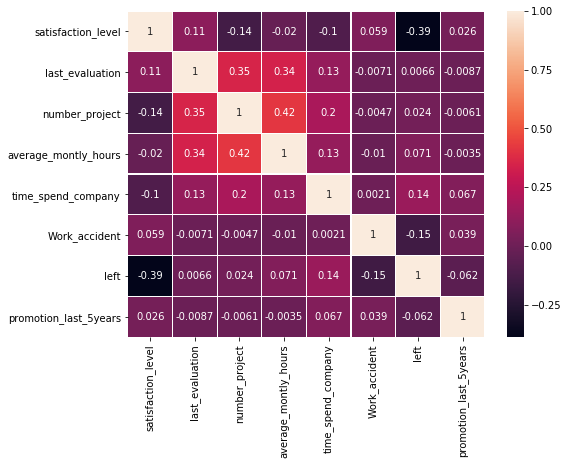

In [10]:
sns.heatmap(data.corr(),annot=True, linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

если принять, что существенный уровень корреляции это 0,5 и больше (-0,51 и меньше), то переменные из датасета
не имеют сильной взаимосвязи.
Тем не менее  можно выделить
1) number_project и average_montly_hours
2) satiafaction_level и left
3) last_evaluation и average_montly_hours
4) number_project и last_evaluation

### 3.  Визуализировать несколько взаимосвязей между переменными 

вузуализируем number_project и average_montly_hours
number_project являются категориальными данными

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


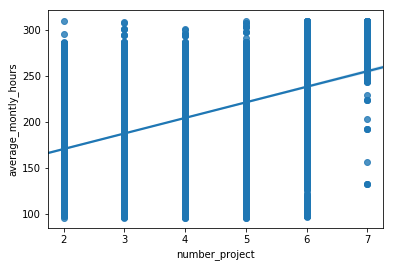

In [11]:
sns.regplot(x= data['number_project'], y=data['average_montly_hours'], fit_reg=True) 

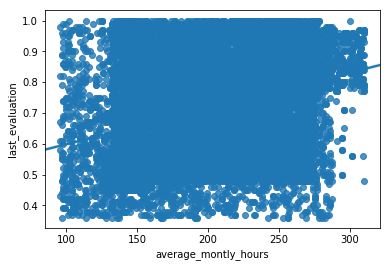

In [12]:
sns.regplot(x= data['average_montly_hours'], y=data['last_evaluation'], fit_reg=True) 

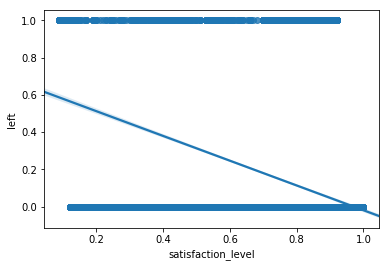

In [13]:
# left тоже категориальная переменная
sns.regplot(x= data['satisfaction_level'], y=data['left'], fit_reg=True) 

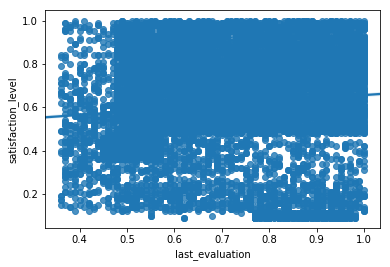

In [14]:
sns.regplot(x= data['last_evaluation'], y=data['satisfaction_level'], fit_reg=True) 

In [15]:
# добавим для исследования корреляции данные из salary, отдела и кол-ва проектов
# применит для данных переменных one-hot encoding 
data_new = pd.get_dummies(data, columns = ['salary','sales', 'number_project'],
                             prefix=['salary','sales', 'number_project'])
data_new.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,...,sales_product_mng,sales_sales,sales_support,sales_technical,number_project_2,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7
0,0.38,0.53,157,3,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0.80,0.86,262,6,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0.11,0.88,272,4,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0.72,0.87,223,5,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.37,0.52,159,3,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [16]:
data_new.corr()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,...,sales_product_mng,sales_sales,sales_support,sales_technical,number_project_2,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7
satisfaction_level,1.000000,0.105021,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.029708,-0.047415,0.031367,...,0.006919,0.004007,0.009185,-0.009345,-0.234648,0.183222,0.212077,0.126195,-0.397779,-0.261892
last_evaluation,0.105021,1.000000,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.020628,0.005221,0.006191,...,-0.001989,-0.023031,0.017104,0.013742,-0.375239,0.001673,0.089488,0.127397,0.119940,0.110482
average_montly_hours,-0.020048,0.339742,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.007101,-0.001050,0.005007,...,-0.005494,-0.001718,-0.002444,0.013638,-0.354698,-0.043181,0.052236,0.104726,0.219652,0.197965
time_spend_company,-0.100866,0.131591,0.127755,1.000000,0.002120,0.144822,0.067433,0.039953,-0.040110,0.018299,...,-0.003919,0.015150,-0.030111,-0.027991,-0.094699,-0.088246,-0.018978,0.098192,0.138564,0.055508
Work_accident,0.058697,-0.007104,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009040,-0.006813,0.001856,...,0.001246,-0.004955,0.012079,-0.006070,-0.063898,0.052757,0.021609,0.008185,-0.025246,-0.048326
left,-0.388375,0.006567,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.120929,0.134722,-0.068833,...,-0.011029,0.009923,0.010700,0.020076,0.427189,-0.314888,-0.217191,-0.018316,0.218834,0.235731
promotion_last_5years,0.025605,-0.008684,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.076756,-0.082832,0.040985,...,-0.037288,0.012353,-0.035605,-0.035799,-0.017415,0.009112,0.024584,-0.010399,-0.008548,-0.019425
salary_high,0.029708,-0.020628,-0.007101,0.039953,0.009040,-0.120929,0.076756,1.000000,-0.292560,-0.260274,...,-0.006514,-0.039273,-0.029184,-0.014672,-0.037722,0.040150,0.004273,0.010816,-0.021496,-0.033893
salary_low,-0.047415,0.005221,-0.001050,-0.040110,-0.006813,0.134722,-0.082832,-0.292560,1.000000,-0.847144,...,0.006191,0.023766,0.022038,0.015674,0.065335,-0.056126,-0.012362,-0.010229,0.029975,0.019702
salary_medium,0.031367,0.006191,0.005007,0.018299,0.001856,-0.068833,0.040985,-0.260274,-0.847144,1.000000,...,-0.002632,-0.002174,-0.006035,-0.007673,-0.045008,0.034361,0.010107,0.004319,-0.018322,-0.001060


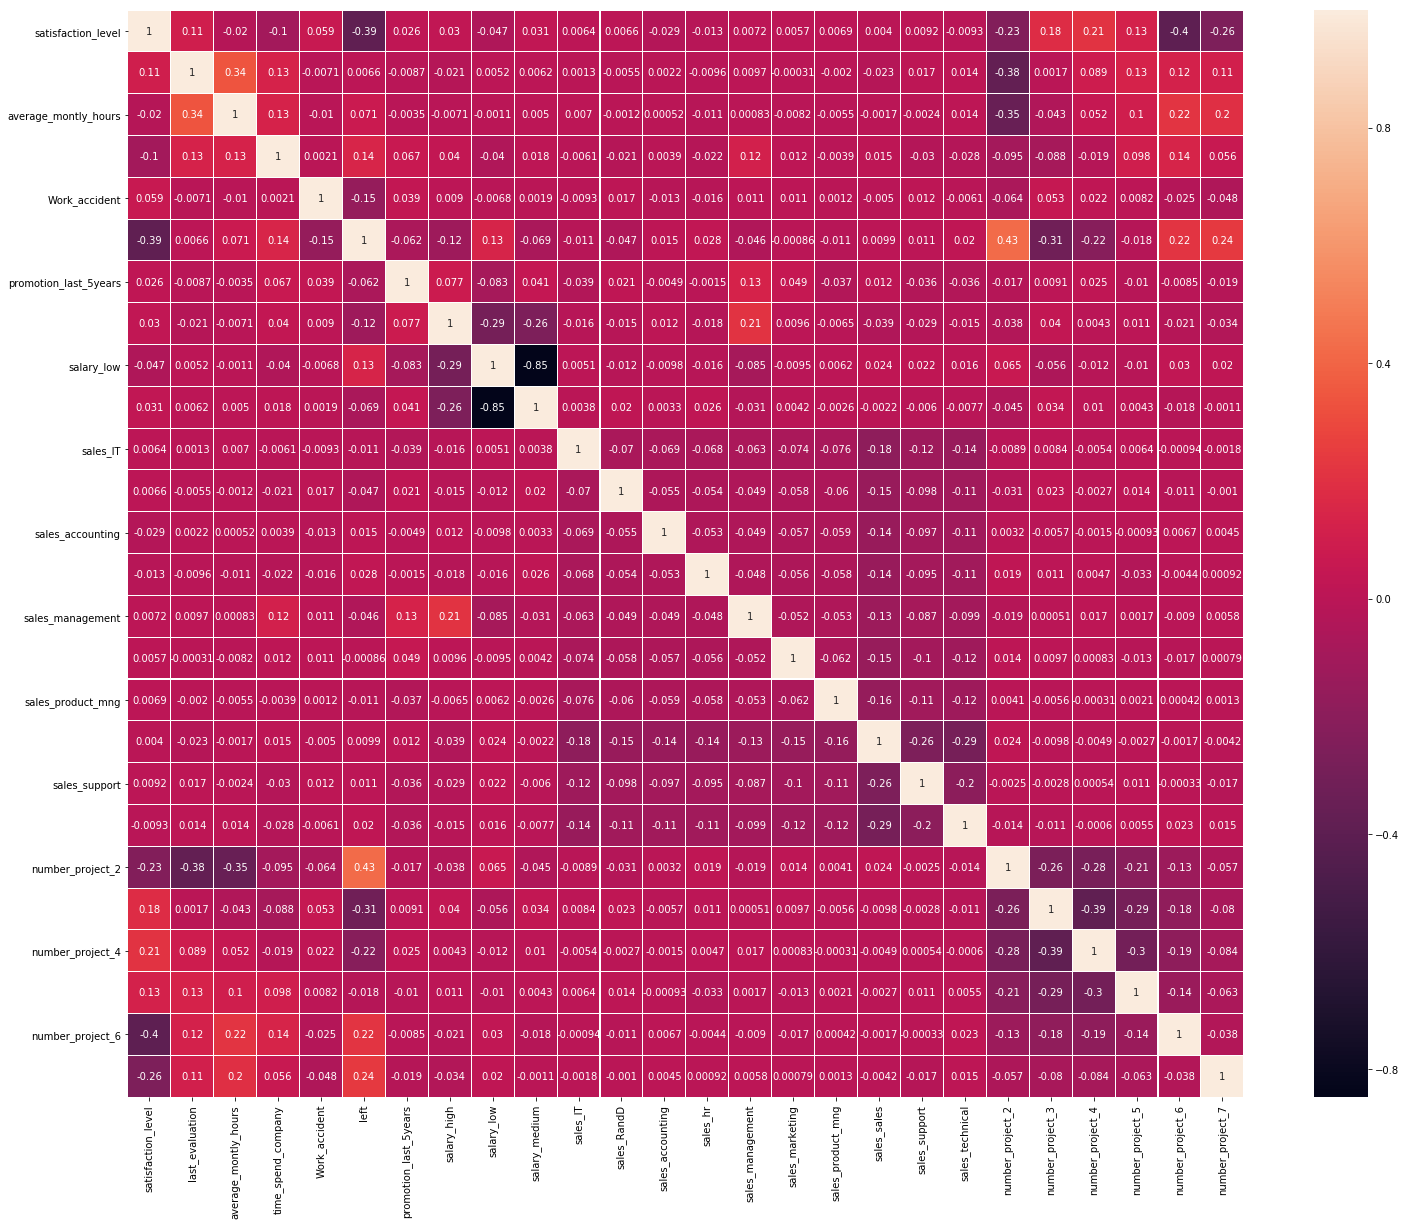

In [17]:
sns.heatmap(data_new.corr(),annot=True, linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(25,20)
plt.show()

В целом коэффициент лин. корреляции остался не высоким.
Но можно увидеть корреляции в области number_project. 
Отрицательную корреляцию -0,4 между satisfaction_level и number_project_6. У работников с number_project_6 уровень удовлетворенности ниже чем у работников с другим number_project. Небольшая положительная корреляция у работников с number_project_3-5 проектов.
Еще повод посмотреть на показатель number_project - это положительная корреляция между left и number_project_2 и 7. 
C number_project_2, 6 и 7 что-то не так.

In [18]:
data.groupby(['number_project','sales','left']).count()['satisfaction_level']

number_project  sales        left
2               IT           0        68
                             1       114
                RandD        0        41
                             1        46
                accounting   0        35
                             1        91
                hr           0        31
                             1       109
                management   0        44
                             1        35
                marketing    0        49
                             1       105
                product_mng  0        61
                             1        88
                sales        0       240
                             1       477
                support      0       112
                             1       238
                technical    0       140
                             1       264
3               IT           0       345
                             1         2
                RandD        0       244
                       

In [19]:
data.groupby(['sales','left']).count()['number_project']

sales        left
IT           0        954
             1        273
RandD        0        666
             1        121
accounting   0        563
             1        204
hr           0        524
             1        215
management   0        539
             1         91
marketing    0        655
             1        203
product_mng  0        704
             1        198
sales        0       3126
             1       1014
support      0       1674
             1        555
technical    0       2023
             1        697
Name: number_project, dtype: int64

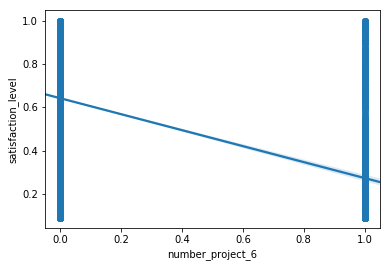

In [20]:
sns.regplot(x= data_new['number_project_6'], y=data_new['satisfaction_level'], fit_reg=True) 

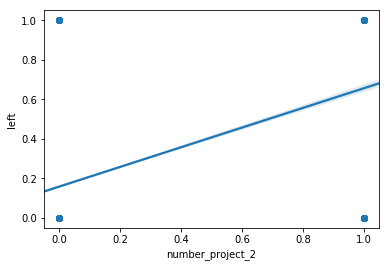

In [21]:
sns.regplot(x= data_new['number_project_2'], y=data_new['left'], fit_reg=True) 

### 4. С использованием t-test статистики проверить взаимосвязи между несколькими переменными 

Гипотеза: у работников с high и low уровнями з/п  satisfaction_level отличается

In [29]:
low_salary = data[data['salary'] == 'low']
high_salary = data[data['salary'] == 'high']

In [23]:
low_salary.shape

(7316, 10)

In [24]:
high_salary.shape

(1237, 10)

In [38]:
stats.ttest_ind(low_salary['satisfaction_level'], high_salary['satisfaction_level'])

Ttest_indResult(statistic=-4.76273109535092, pvalue=1.9413281282548522e-06)

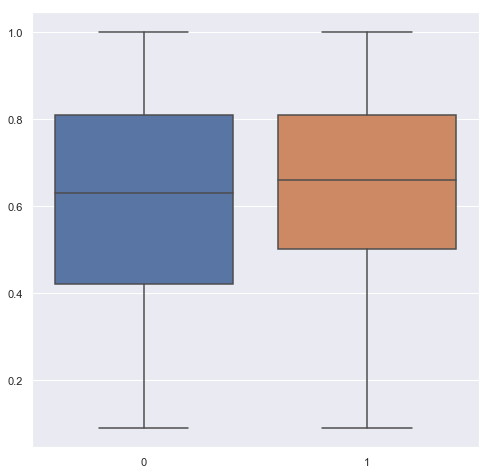

In [39]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.boxplot(data=(low_salary['satisfaction_level'], high_salary['satisfaction_level'] ))

Вывод: да, satisfaction_level у работников с low и high з/п отличается

Гипотеза: last_evaluation у Low и high з/п разный.

In [43]:
stats.ttest_ind(low_salary['last_evaluation'], high_salary['last_evaluation'])

Ttest_indResult(statistic=2.4113213173252896, pvalue=0.015915781898328183)

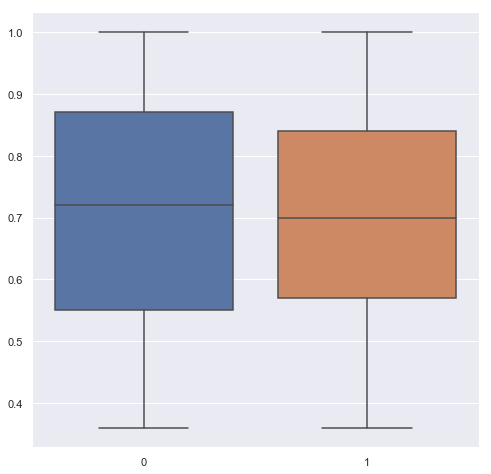

In [44]:
sns.boxplot(data=(low_salary['last_evaluation'], high_salary['last_evaluation'] ))

Вывод: средний last_evaluation для low и high приближены друг к другу. Но говорить об их статистической одинаковости нельзя, p-value = 0.02, что меньше 0,05

Гипотеза: уровень покинувших компанию для number_project = 6, не отличается от среднего в компании
Применяем одновыборочный t-критерий

In [51]:
number_project_6 = data[data['number_project'] == 6]

In [53]:
stats.ttest_1samp(number_project_6['left'], data['left'].mean())

Ttest_1sampResult(statistic=22.05689237771301, pvalue=1.812934655433458e-90)

Вывод: нет, уровень покинувших компанию с number_project_6 отличается от среднего уровня покинувших компанию

In [47]:
print(data.groupby(['number_project']).mean()['left'])
print(data['left'].mean())

number_project
2    0.656198
3    0.017756
4    0.093700
5    0.221659
6    0.557922
7    1.000000
Name: left, dtype: float64
0.2380825388359224


### 5. Рассчитать сколько работников работает в каждом департаменте

In [54]:
data.groupby(['sales']).count()[['satisfaction_level']].sort_values('satisfaction_level', ascending=False)

,satisfaction_level
sales,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


### 6. Показать распределение сотрудников по зарплатам

In [55]:
salary_dist=data.groupby(['salary']).count()[['satisfaction_level']].sort_values('satisfaction_level', 
                                                                                 ascending=False).reset_index()

In [56]:
salary_dist

,salary,satisfaction_level
0,low,7316
1,medium,6446
2,high,1237


<BarContainer object of 3 artists>

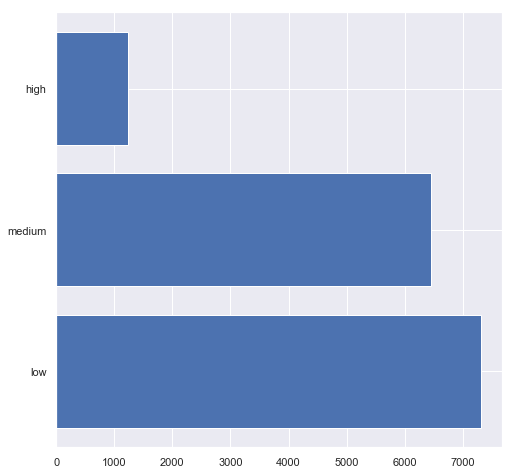

In [57]:
plt.barh(salary_dist['salary'], salary_dist['satisfaction_level'])

### 7. Показать распределение сотрудников по зарплатам совместно с департаментами

In [58]:
salary_dist_dep=data.groupby(['sales', 'salary']).count()['satisfaction_level']

In [59]:
salary_dist_dep

sales        salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: satisfaction_level, dtype: int64

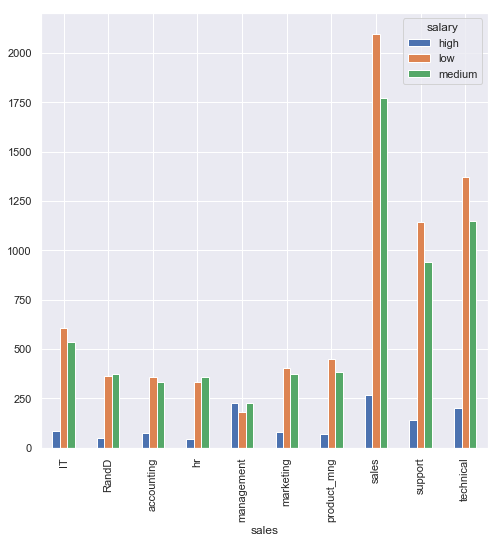

In [60]:
salary_dist_dep_U=salary_dist_dep.unstack()

salary_dist_dep_U.plot(kind='bar')

### 8. Сколько сотрудников покинули компанию

In [61]:
print('left', data[data['left'] == 1].count()['satisfaction_level'])
print('part', data[data['left'] == 1].count()['satisfaction_level']/data.count()['satisfaction_level'])

left 3571
part 0.2380825388359224


### 9. Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию

Наибольшая отрицательная корреляция у left с satisfaction_level.
Satisfaction_left - комплексный показатель, включающий в себя несколько индикаторов (например, з/п, загруженность, отношения в коллективе), не знаем какие именно.
Наибольшая отрицательная корр у  satisfaction_level с number_project = 6, 7, 2

number_project = 6 и 7 коррелирует c average_montly_hours положительно
number_project_2 коррелирует отрицательно с last_evaluation и average_montly_hours

Уход может быть связан с загруженностью и недозагруженностью работника

По одновыборочному t-критерию проверим схожеть уровней left для генеральной совокупности и number_project = 2, 6 и 7

In [62]:
data.groupby(['left']).mean()['satisfaction_level']

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [63]:
data.groupby(['left']).mean()['average_montly_hours']

left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64

1. Гипотеза: уровень покинувших компанию с number_project = 2 не отличается от среднего по всей компании

In [64]:
number_project_2 = data[data['number_project'] == 2]

In [65]:
stats.ttest_1samp(number_project_2['left'], data['left'].mean())

Ttest_1sampResult(statistic=43.008106655077164, pvalue=1.005361553903433e-299)

Вывод: нет, уровень покинувших компанию с number_project_2 отличается от среднего уровня покинувших компанию

2. Гипотеза: уровень покинувших компанию с number_project = 6 и 7 не отличается от среднего по всей компании

In [66]:
number_project_67 = data[(data['number_project'] == 6) | (data['number_project'] == 7)]

In [67]:
stats.ttest_1samp(number_project_67['left'], data['left'].mean())

Ttest_1sampResult(statistic=31.366123197862876, pvalue=9.4063345137855e-165)

Вывод: нет, уровень покинувших компанию с number_project_67 отличается от среднего уровня покинувших компанию

In [68]:
data.groupby(['number_project']).mean()['left']

number_project
2    0.656198
3    0.017756
4    0.093700
5    0.221659
6    0.557922
7    1.000000
Name: left, dtype: float64

In [69]:
data['left'].mean()

0.2380825388359224

3. Гипотеза: у увольвшихся и оставшихся работников одинаковый средний уровень загруженности

In [70]:
hours_left = data[data['left'] == 1]
hours_stay = data[data['left'] == 0]

In [71]:
hours_left.shape

(3571, 10)

In [72]:
stats.ttest_ind(hours_left['average_montly_hours'], hours_stay['average_montly_hours'])

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

Вывод: нет, статистически средний уровень загруженности разный

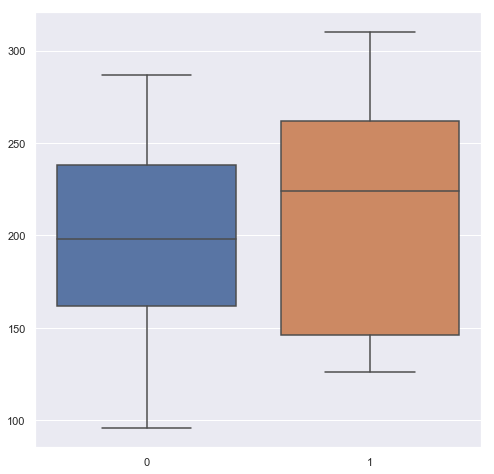

In [83]:
sns.boxplot(data=(hours_stay['average_montly_hours'], hours_left['average_montly_hours'] ))

In [74]:
stats.ttest_1samp(hours_left['average_montly_hours'], data['average_montly_hours'].mean())

Ttest_1sampResult(statistic=6.218506380185923, pvalue=5.598760530139529e-10)

Вывод: у уволенных работников средний уровень загруженности был выше среднего по компании

In [75]:
data.groupby(['number_project']).mean()['average_montly_hours']

number_project
2    160.342546
3    197.507522
4    205.122108
5    212.061572
6    238.694208
7    276.078125
Name: average_montly_hours, dtype: float64

Для number_project = 2, видим недозагруженность от средней. Возможно недозагруженность также является причиной ухода, как по собственному желанию, так и в рамках сокращения (на что косвенно может указывать корреляция с level_evaluation). Но чтобы это проверить, у нас нет данных.

4. Гипотеза: работа в отделе продаж не является причиной ухода из компании

In [76]:
sales_dep = data[data['sales'] == 'sales']

In [77]:
stats.ttest_1samp(sales_dep['left'], data['left'].mean())

Ttest_1sampResult(statistic=1.0240186757175112, pvalue=0.3058862981518342)

Вывод: c точки зрения статистики, да, не является.
Если посмотреть на средние, то реже покидают компанию работники managment и RandD. Чаще - hr, accounting, technical

In [78]:
data.groupby(['sales']).mean()['left']

sales
IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
Name: left, dtype: float64

In [79]:
data['left'].mean()

0.2380825388359224